In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import erfc

In [ ]:
# Function to generate a square wave signal and its inverted square wave signal

def message_signal(m,T):
                                            # bit transmission time
    t = np.arange(0, T, T/alpha)              # Creating array t for signal transmission time [0......T]
    message = []                            # creating 2 arrays to memory
    not_message = []
    for i in range(len(m)):
        if m[i] == 1:                       # for each value of array m, if m=1 then create array m_s containing all values 1
            m_s = np.ones(len(t))           # an array of invm_s containing all the values 1
            invm_s = np.zeros(len(t))
        else:
            m_s = np.zeros(len(t))
            invm_s = np.ones(len(t))
        message.extend(m_s)
        not_message.extend(invm_s)
    return message , not_message

In [ ]:
alpha = 35000
N = 500                                     # Số lượng bit
T = 1                                       # Thời gian truyền 1 bit
Tb = 1*N                                    # Thời gian lấy mẫu
t = np.arange(0, Tb, Tb/(alpha*N))          # Tạo một mảng [0...Tb/800...Tb].
np.random.seed(121)
m = x = np.random.randint(2, size = N)                   # Gọi hàm Random

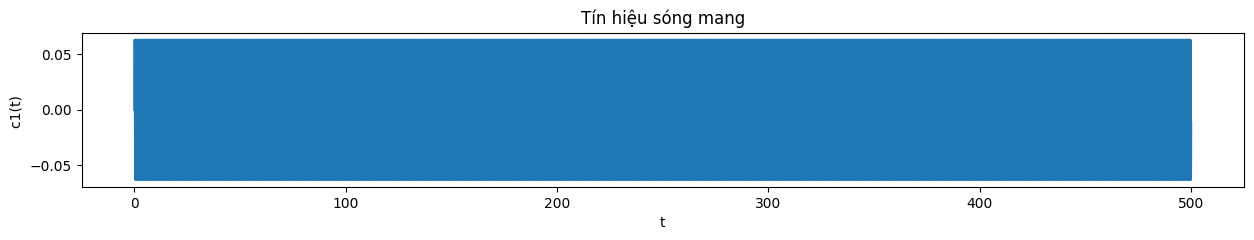

In [ ]:
fc = 2                                          # Tần số cắt
songmang = np.sqrt(2/Tb) * np.sin(2 * np.pi * fc * t)  # Tạo sóng hình sin để làm sóng mang
t = np.arange(0, Tb, Tb/alpha)
fig, ax = plt.subplots(1, 1, figsize=(15, 2))   # Định nghĩa 1 ô đồ thị với kích thước 15x2
fig.subplots_adjust(hspace=0.5)                 # Đặt khoảng trống đồ thị là 0.5
ax.plot(t,np.sqrt(2/Tb) * np.sin(2 * np.pi * fc * t))   # Vẽ đồ thị sóng mang trục x là mảng t và trục y là mảng c
ax.set_title('Tín hiệu sóng mang')                      # Đặt tiêu đề
ax.set_xlabel('t')
ax.set_ylabel('c1(t) ')
t = np.arange(0, Tb, Tb/alpha/N)

17500000 17500000


Text(0, 0.5, 'c1(t) ')

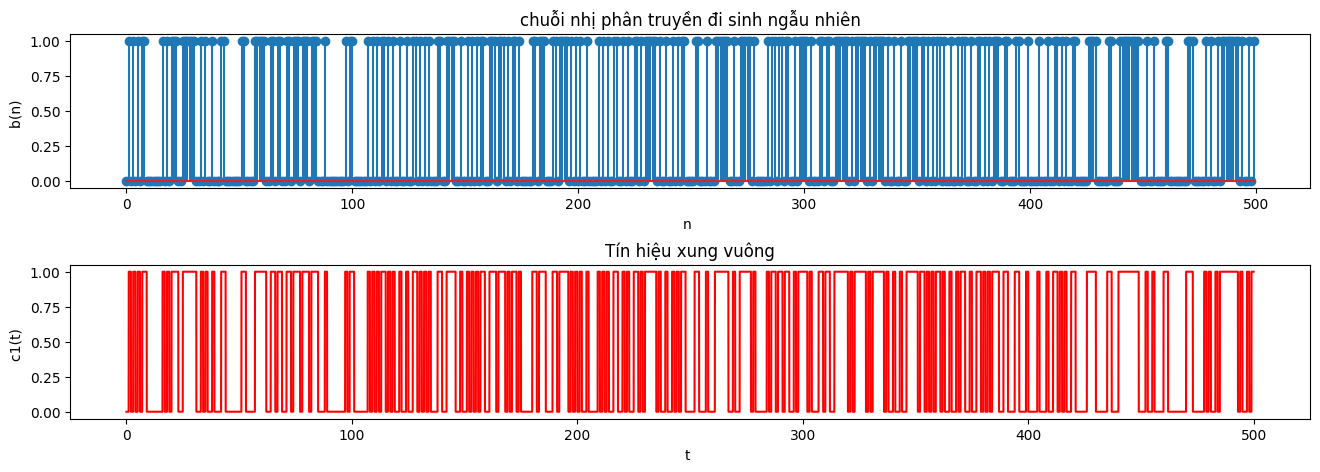

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
fig.subplots_adjust(hspace=0.5)                                  # Đặt khoảng trống đồ thị là 0.5
ax[0].stem(m)                                                    # Vẽ cột dấu chấm m là mảng bit nhị phân
ax[0].set_title('chuỗi nhị phân truyền đi sinh ngẫu nhiên')
ax[0].set_xlabel('n ')
ax[0].set_ylabel('b(n) ')

message , not_message = message_signal(m,T)                     # Trả về 2 mảng tương ứng 1,0

print(len(message), len(not_message))
ax[1].plot(t,message, 'r')                                      # Vẽ dưới dạng xung vuông
ax[1].set_title('Tín hiệu xung vuông')
ax[1].set_xlabel('t ')
ax[1].set_ylabel('c1(t) ')

Text(0, 0.5, 'giá trị')

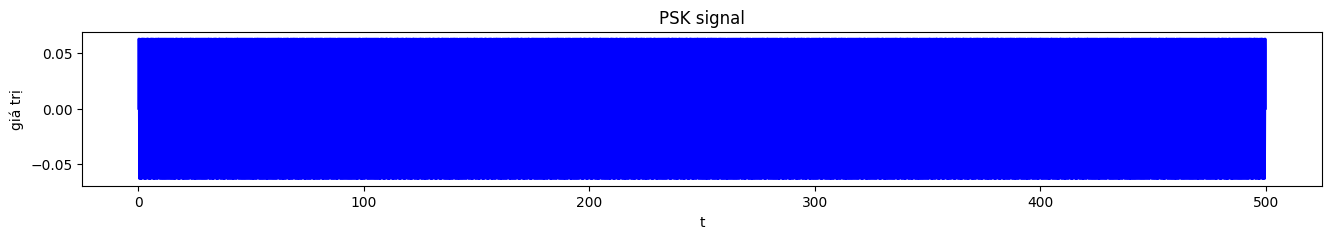

In [ ]:
def modulation(message_signal,not_message_signal):                  # Hàm tính toán để mã hóa PSK
    return message_signal*songmang*-1 - not_message_signal*songmang*-1    # nhân với sóng hinh sin

psk = modulation(message,not_message)                               # Mã hóa lưu ở psk

fig, ax = plt.subplots(1, 1, figsize=(16, 2))
ax.figsize=(16, 5)
ax.plot(t,psk, 'b')
ax.set_title('PSK signal')
ax.set_xlabel('t')
ax.set_ylabel('giá trị')

Text(0, 0.5, 'r(t)')

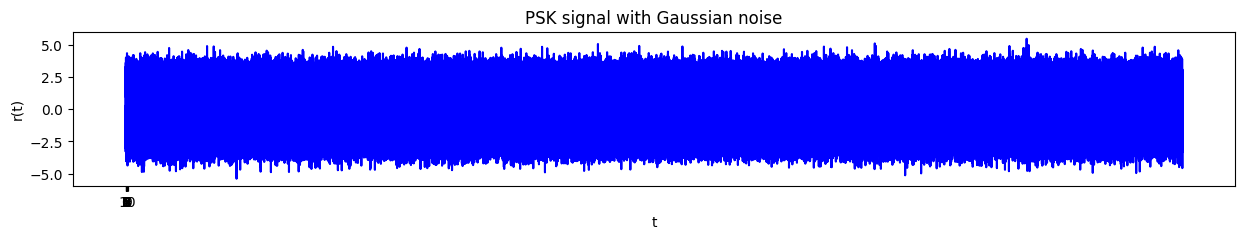

In [ ]:
# AWGN Noise
N0 = 2
noise = np.random.normal(0, np.sqrt(N0/2), len(psk)) # Gaussian noise with a mean value of 0 and standard deviation of np.sqrt(N0/2)
psk_noisy = psk + noise


fig, ax = plt.subplots(1, 1, figsize=(15, 2))

#Plotting
ax.figsize=(15, 5)
ax.plot(t, psk_noisy[:len(t)], 'b')
ax.set_title('PSK signal with Gaussian noise')
ax.set_xlabel('t')
ax.set_ylabel('r(t)')

Text(0.5, 0, 'n')

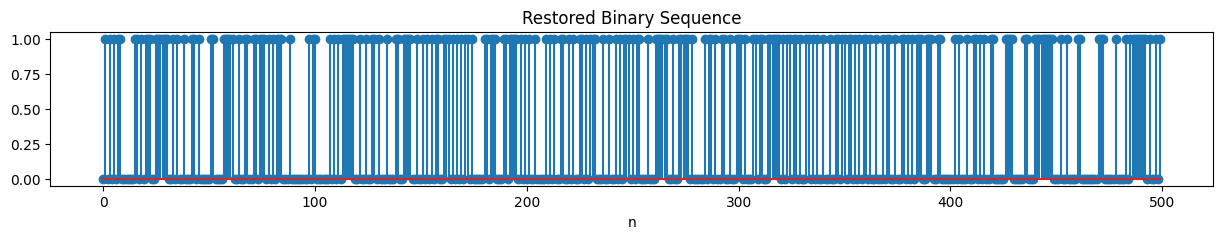

In [ ]:
# Demodulation
def demodulation():
    t = np.arange(0, Tb, Tb/alpha)
    hx = math.sqrt(2/Tb)*np.sin(2 * np.pi * fc * t / alpha)
    psk_noisy_list = np.array_split(psk_noisy, N)
    output = []
    for i in range(len(psk_noisy_list)):
        if np.trapz(psk_noisy_list[i] * hx, t) >= 0:
            output.append(1)
        else:
            output.append(0)
    return output

demod = demodulation()

#Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 2))
ax.stem(demod)
ax.set_title('Restored Binary Sequence')
ax.set_xlabel('n')

Text(0, 0.5, 'b(n)')

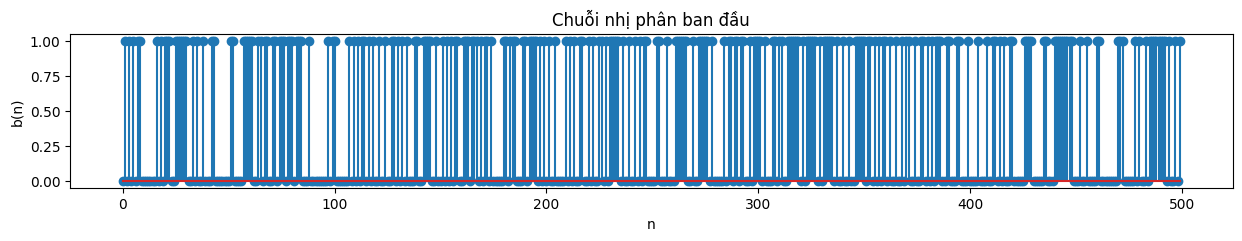

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 2))          # Vẽ lại tín hiệu ban đầu
fig.subplots_adjust(hspace=0.5)

ax.stem(m)
ax.set_title('Chuỗi nhị phân ban đầu')
ax.set_xlabel('n')
ax.set_ylabel('b(n)')

In [ ]:
def calculate_bit_error_rate(InitialBit, ReceivedBit):
    num_errors = 0
    for i in range(len(InitialBit)):
        if InitialBit[i] != ReceivedBit[i]:
            num_errors += 1
    ber = num_errors / len(InitialBit)
    return ber


In [ ]:
InitialBit = m
ReceivedBit = demod
ber = calculate_bit_error_rate(InitialBit, ReceivedBit)
print("Xác xuất lỗi bit: {:.2f}%".format(ber * 100))

Xác xuất lỗi bit: 4.40%


In [ ]:
Eb = np.trapz(((songmang)**2),t*3)
print(f"Bit Error Probability in theory: {1/2 * erfc(np.sqrt(Eb / N0)) * 100}%")

Bit Error Probability in theory: 4.163225833177572%
